In [1]:
import SimpleITK as sitk
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from glob import glob
from PIL import Image
import csv
from random import randint
from load_tools import *

%matplotlib inline

/mnt/home.stud/dobkomar/nodule_detection/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'mtrand' does not match runtime version 3.5
  return f(*args, **kwds)


Some of the code below is based on the script from https://www.kaggle.com/arnavkj95/candidate-generation-and-luna16-preprocessing/notebook

## Show example from dataset

In [2]:
SUBSET = 0   # SET NEEDED SUBSET
path_subset = '/datagrid/Medical/nodules/Luna/subset' + str(SUBSET)
files_names = [f for f in listdir(path_subset) if isfile(join(path_subset, f))]

id_scan_show = 10
scan, orig,spacing = load_itk(join(path_subset, files_names[id_scan_show]))

In [3]:
def plot_ct_scan(scan):
    f, plots = plt.subplots(int(scan.shape[0] / 20) + 1, 4, figsize=(25, 25))
    for i in range(0, scan.shape[0], 5):
        plots[int(i / 20), int((i % 20) / 5)].axis('off')
        plots[int(i / 20), int((i % 20) / 5)].imshow(scan[i], cmap=plt.cm.bone) 

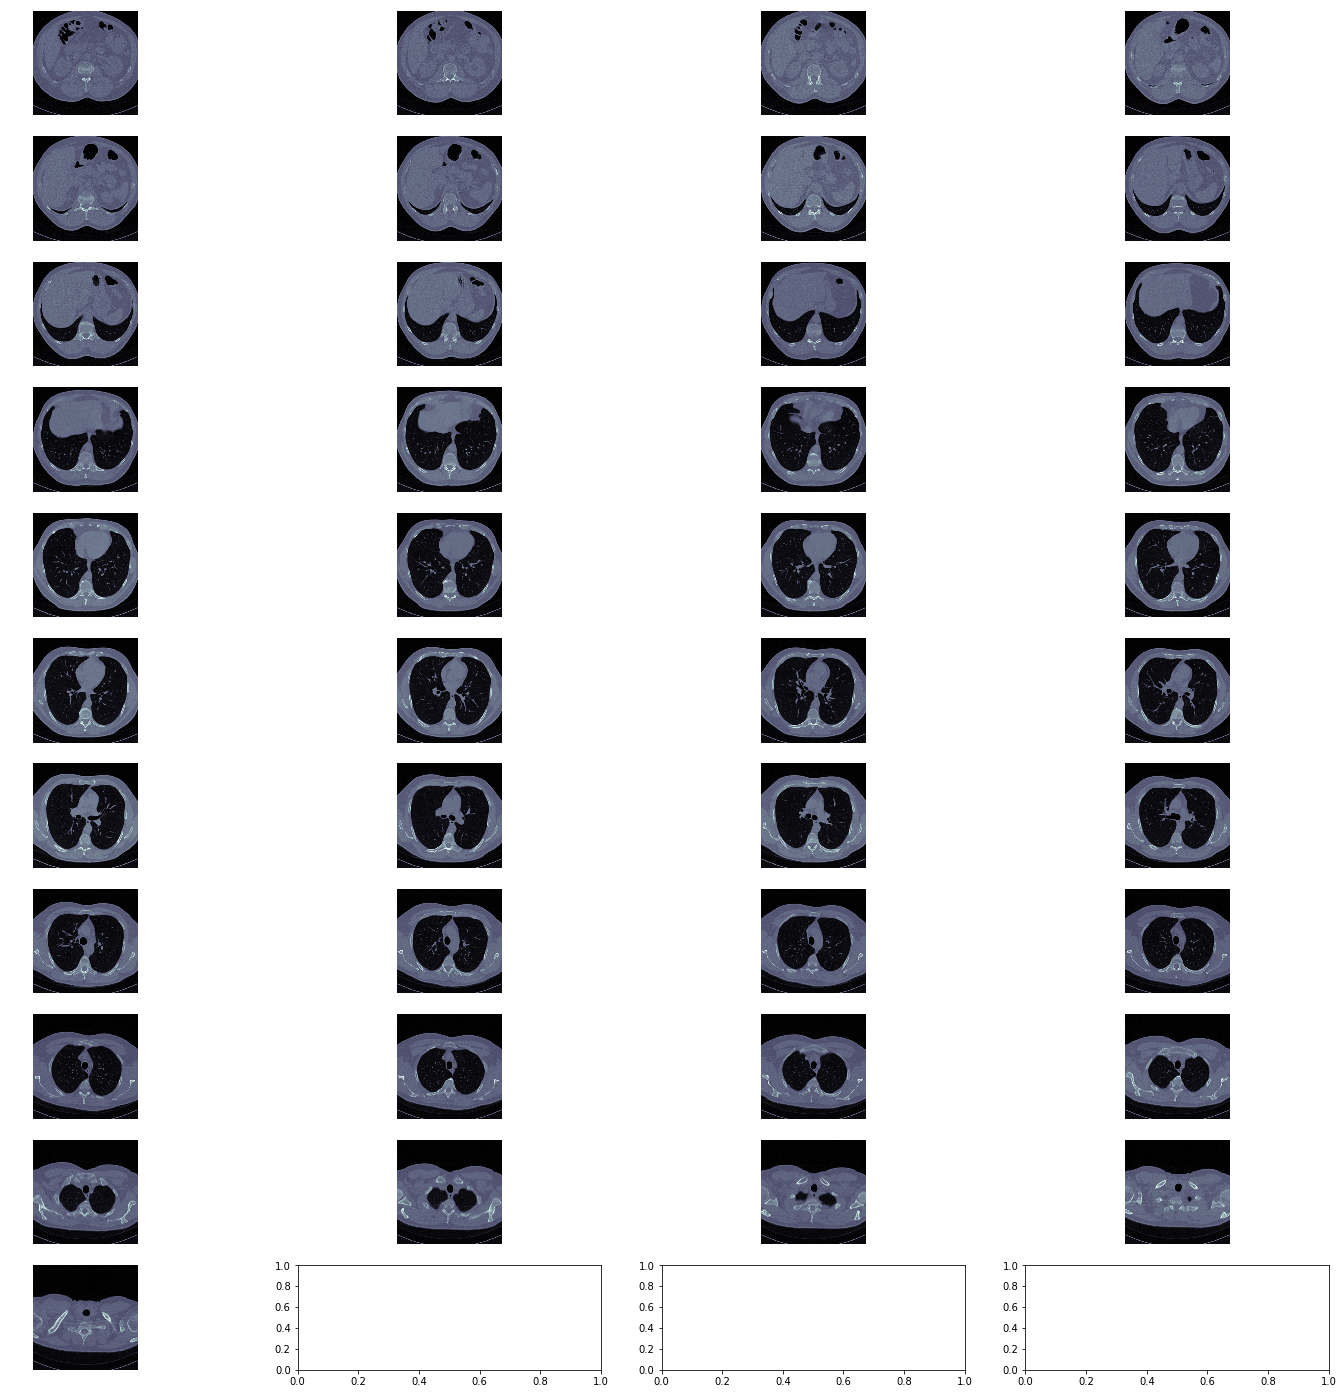

In [4]:
plot_ct_scan(scan)

In [7]:
luna_path = "/datagrid/Medical/nodules/Luna/"
luna_subset_path = luna_path+"subset0/"
output_path = "../../NoduleDetection/data/luna_output/"

IMAGE 0049 0477


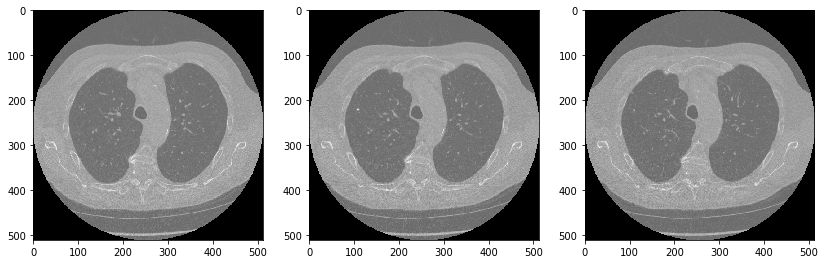

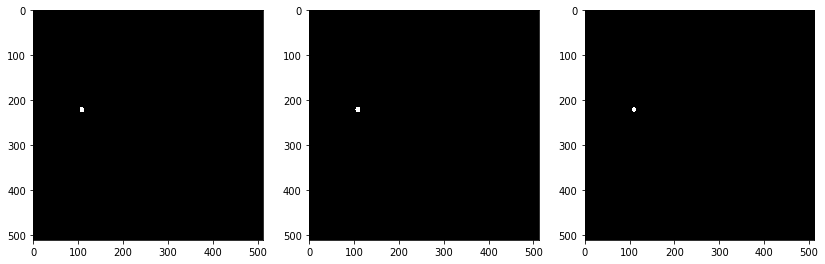

IMAGE 0024 0347


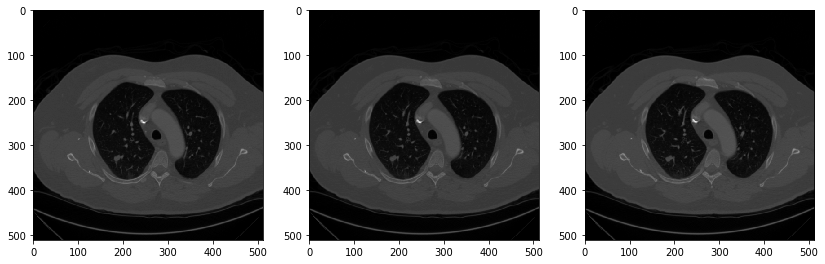

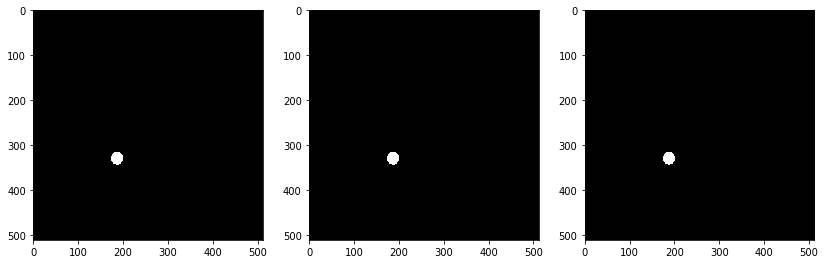

IMAGE 0026 1018


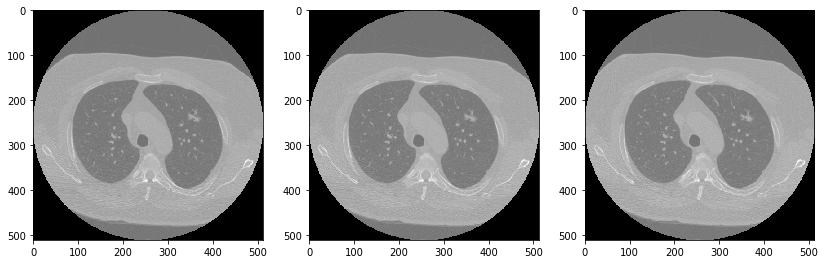

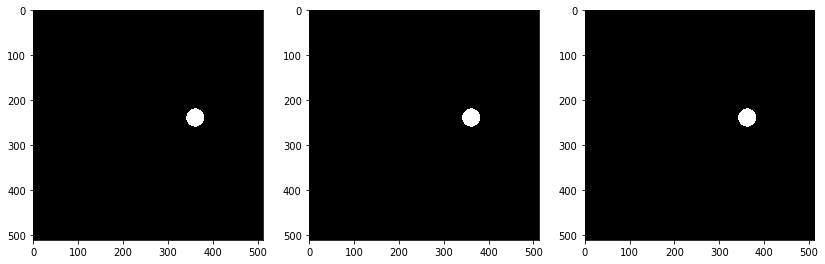

In [8]:
data_names = [f for f in listdir(output_path) if isfile(join(output_path, f))]

def plot_row(columns, rows, image):
    w, h = 16, 16
    fig=plt.figure(figsize=(14, 14))
    ind = 0
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(image[ind], cmap='gray')
        ind += 1
    plt.show()

for f in range(3):
    file_name = data_names[f].split('_')
    files = []
    print('IMAGE ' + file_name[1] + ' ' + file_name[2][:-4])

    # Retrieve both: mask and the image 
    for i in listdir(output_path):
        if isfile(join(output_path,i)) and  file_name[1] +'_'+ file_name[2] in i:
            files.append(i)
    for im in sorted(files, key=str.lower):
        sample = np.load(join(output_path,im))
        columns_, rows_ = sample.shape[0], 1
        plot_row(columns_, rows_, sample)
    plt.show()


In [9]:
sampled_candidates = '../../NoduleDetection/data/luna16/sampledcands.txt'

for s in range(10): # number of subsets
    save_to_npy(luna_path + "subset"+ str(s) + '/', '../../NoduleDetection/data/luna16/subset'+ str(s), sampled_candidates)